# 🛒 Online Retail (UCI) — EDA & KPIs

Goal: Load, clean, and explore the dataset to understand sales patterns and set up for deeper analysis (RFM, basket, forecasting).

Steps

Load & clean → fix data types, handle returns (InvoiceNo starting with C), add Revenue.

KPIs → total revenue, unique orders, unique customers.

Visuals → daily revenue trend, top products, top countries.

Notes

Use errors="coerce" when converting to numeric/datetime.

Only drop NaNs in essential identifiers (InvoiceNo, StockCode, InvoiceDate).

In [9]:
import pandas as pd

# Load dataset (encoding fix for UCI data)
df = pd.read_csv("data.csv", encoding="latin-1")

# Quick checks
print("Rows:", df.shape[0], "Columns: ", df.shape[1])
df.head()

Rows: 541909 Columns:  8


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
#Convert Quality and UnitPrice to numeric numbers
df["Quantity"] = pd.to_numeric(df["Quantity"], errors = "coerce")
df["UnitPrice"] = pd.to_numeric(df["UnitPrice"], errors = "coerce")

#drop missing values for essential columns
df = df.dropna(subset = ["InvoiceNo", "StockCode", "InvoiceDate"])

#calculate revenue
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

#convert invoice date to date time
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"],errors = "coerce")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [14]:
#added Revenue column to the df
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue'],
      dtype='object')

In [17]:
#get quick KPIs

#filter out the cancellations (Invoice no. starting with c)
sales = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

total_revenue = sales["Revenue"].sum()
num_orders = sales["InvoiceNo"].nunique()
num_customers = sales["CustomerID"].nunique()

print("Total Revenue:", round(total_revenue, 2))
print("Number of Orders:", num_orders)
print("Unique Customers:", num_customers)

Total Revenue: 10644560.42
Number of Orders: 22064
Unique Customers: 4339


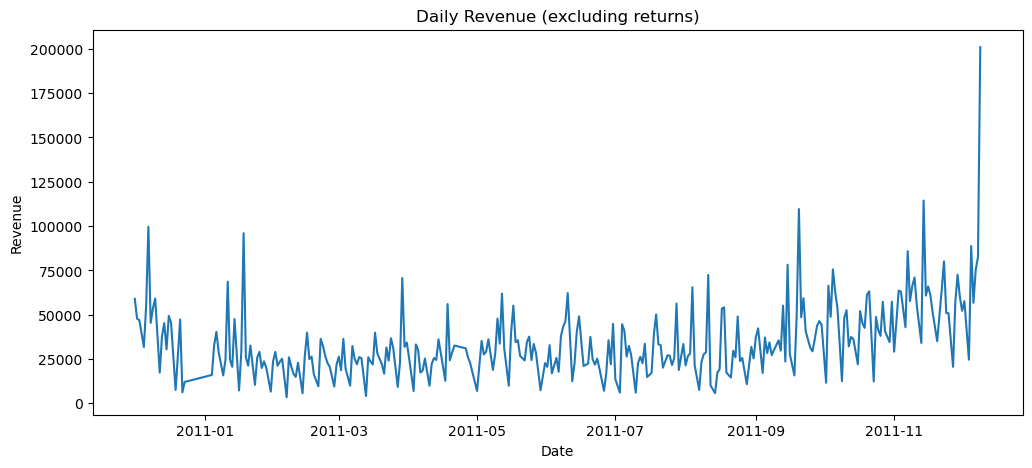

In [29]:
#daily revenue trend

import matplotlib.pyplot as plt
daily = sales.groupby(sales["InvoiceDate"].dt.date)["Revenue"].sum()

plt.figure(figsize=(12,5))
plt.plot(daily.index, daily.values)
plt.title("Daily Revenue (excluding returns)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

In [45]:
#top sales 

top_products = (
sales.groupby(["StockCode", "Description"])["Revenue"]
    .sum()
    .reset_index()
    .sort_values("Revenue", ascending = False)
    .head(10)
)

top_products

,StockCode,Description,Revenue
4764,DOT,DOTCOM POSTAGE,206248.77
1551,22423,REGENCY CAKESTAND 3 TIER,174484.74
3029,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60
4209,85123A,WHITE HANGING HEART T-LIGHT HOLDER,104340.29
3290,47566,PARTY BUNTING,99504.33
4183,85099B,JUMBO BAG RED RETROSPOT,94340.05
2455,23166,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
4765,M,Manual,78110.27
4767,POST,POSTAGE,78101.88
2341,23084,RABBIT NIGHT LIGHT,66964.99


In [46]:
#top countries by revenue

top_countries=(
    sales.groupby(["Country"])["Revenue"]
    .sum()
    .reset_index()
    .sort_values("Revenue", ascending = False)
    .head(10)
)

top_countries

,Country,Revenue
36,United Kingdom,9003097.964
24,Netherlands,285446.340
10,EIRE,283453.960
14,Germany,228867.140
13,France,209715.110
0,Australia,138521.310
31,Spain,61577.110
33,Switzerland,57089.900
3,Belgium,41196.340
32,Sweden,38378.330


<Axes: title={'center': 'Monthly Revenue'}, xlabel='InvoiceDate'>

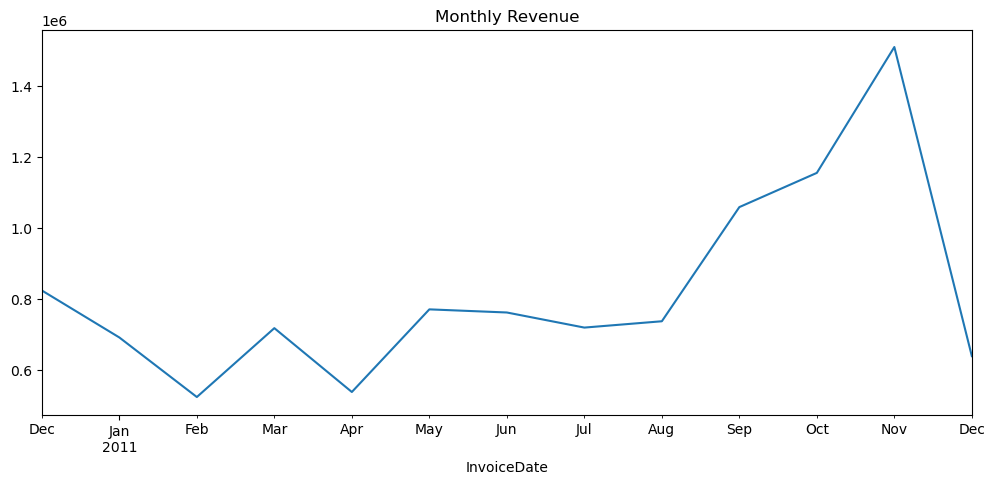

In [49]:
#Monthly revenue Trendabs

monthly = sales.groupby(sales["InvoiceDate"].dt.to_period("M"))["Revenue"].sum()
monthly.plot(kind="line", figsize=(12,5), title="Monthly Revenue")

In [52]:
#see how much each customer spends

customer_revenue = (
    sales.groupby("CustomerID")["Revenue"].sum()
    .reset_index()
    .sort_values("Revenue", ascending = False)
    .head(10)
)

customer_revenue

,CustomerID,Revenue
1690,14646.0,280206.02
4202,18102.0,259657.30
3729,17450.0,194550.79
3009,16446.0,168472.50
1880,14911.0,143825.06
55,12415.0,124914.53
1334,14156.0,117379.63
3772,17511.0,91062.38
2703,16029.0,81024.84
0,12346.0,77183.60
